In [1]:
from utils.pred_loader import PredLoader
from utils.global_utils import BAD_NAN
import matplotlib.pyplot as plt
import numpy as np

In [2]:
color_id = 'collar'
color_pair = 'RG'
threshold = BAD_NAN

In [3]:
preds = PredLoader(color_id + '_preds_df.csv')

In [5]:
# find initial percent of nan values in sleap predictions
preds.get_nan_color_pair(color_pair)

182it [00:06, 27.35it/s]


In [ ]:
# save the calculated error values (can change the file name if you don't want to save over old values)
preds.df.to_csv(color_id + '_preds_df.csv', index=False)

In [ ]:
# find average error and percent of useable videos
errors = preds.df[preds.df['color pair'] == color_pair]['error']
print(f'average initial error: {round(100 * np.mean(errors), 3)}%, useable videos: {len([x for x in errors if x < threshold])} videos, percent of videos useable: {round(100 * len([x for x in errors if x < threshold]) / len(errors), 3)}%')

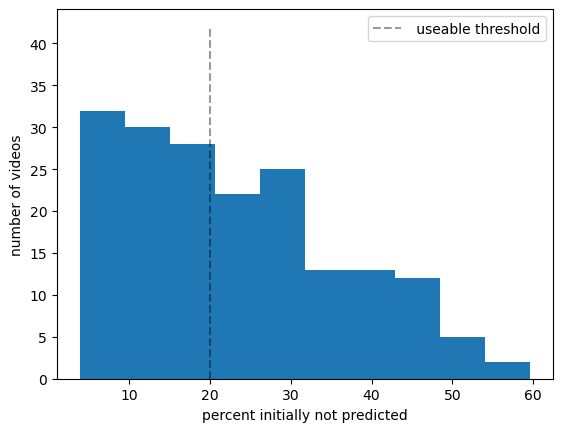

In [17]:
# graph error distribution for visualisation
plt.hist(100 * errors)
plt.xlabel("percent initially not predicted")
plt.ylabel("number of videos")
plt.vlines(threshold * 100, 0, 42, 'k', linestyle='dashed', alpha=0.4, label=' useable threshold')
plt.legend()